In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from scipy import stats

## PART 1: Attack(DDOS)/ Benign        

### Loading the Dataset

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
df.shape

(225745, 85)

In [4]:
df.describe()

/home/ecs-user/is5126/final-project/.venv/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/ecs-user/is5126/final-project/.venv/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.000000,225745.00000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,2.257410e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,225745.000000,225745.0,225745.0,225745.0,225745.000000,225745.000000,2.257450e+05,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.0,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.0,225745.0,225745.0,225745.0,225745.0,225745.0,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,38257.568402,8879.61946,7.600288,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,2735.585147,16.718776,890.536849,1230.172938,inf,inf,1.580587e+06,4.248569e+06,1.348977e+07,2.811855e+04,1.539652e+07,2.540610e+06,5.195207e+06,1.299434e+07,2.073698e+05,6.564701e+06,9.476322e+05,1.610306e+06,4.567514e+06,2.257817e+05,0.033223,0.0,0.0,0.0,111.522718,106.789023,1.261508e+04,1.641693e+03,8.072595,3226.045339,515.002137,1085.593207,2.789906e+06,0.002671,0.033223,0.000120,0.351162,0.504463,0.140752,0.0,0.000120,1.005821,574.568843,164.826715,890.536849,111.522718,0.0,0.0,0.0,0.0,0.0,0.0,4.874916,939.463346,4.572775,5.960477e+03,4247.436922,601.048635,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,23057.302075,19754.64740,3.881586,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,3705.123460,50.480568,1120.324921,1733.201267,NaN,NaN,2.701596e+06,7.622819e+06,2.670172e+07,7.598100e+05,3.160826e+07,5.934694e+06,1.078635e+07,2.748870e+07,3.795228e+06,2.198455e+07,4.586374e+06,5.475778e+06,1.617865e+07,4.019290e+06,0.179220,0.0,0.0,0.0,375.790727,511.765795,1.106701e+05,1.989593e+04,15.767713,3813.134850,559.064495,1269.558714,4.115941e+06,0.051614,0.179220,0.010936,0.477334,0.499981,0.347766,0.0,0.010936,1.430781,626.096202,504.892965,1120.324921,375.790727,0.0,0.0,0.0,0.0,0.0,0.0,15.422874,3249.403484,21.755356,3.921834e+04,8037.781019,4319.720339,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max        225745 non-nul

### Initial Data Analysis

1. Confirming target data balance. Benign and Attack have around 40:60 ratio
2. Visualizing attack timeline, attack happened for 20 minutes. During attack proportion DDoS attack far outweigh benign, as expected of DDoS attack


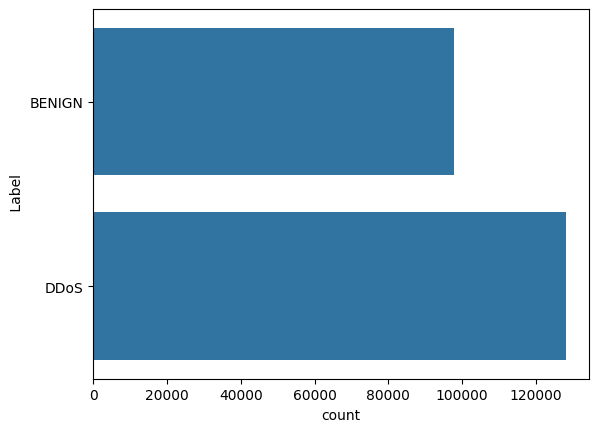

In [6]:
sns.countplot(df[' Label'])
plt.show()

In [7]:
df.columns = df.columns.str.strip()  # Remove leading and trailing spaces|

### Attack Timeline

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
plt.figure(figsize=(15,5))
sns.countplot(df,x='Timestamp', hue='Label')
plt.xticks(rotation=90)
plt.show()

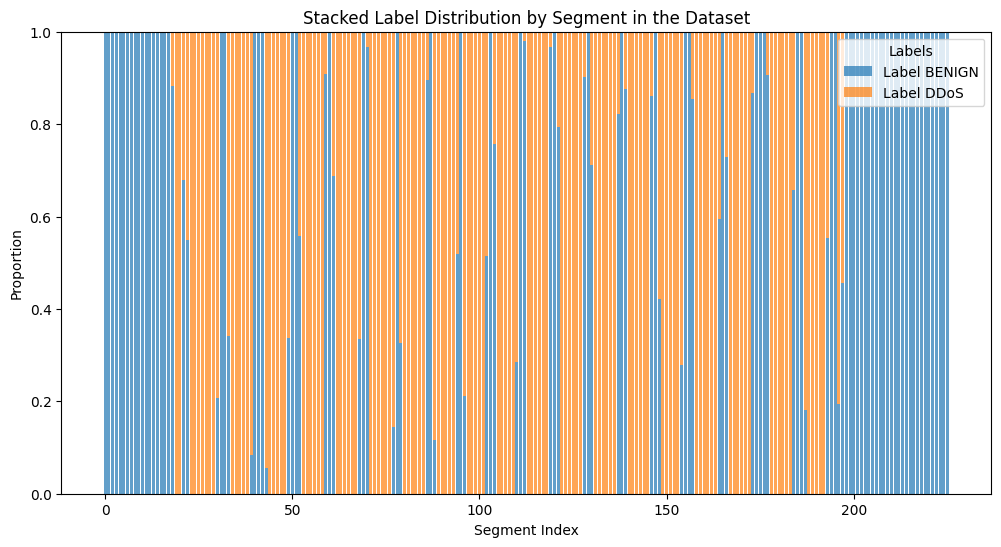

In [8]:
# Define the size of each segment
segment_size = 1000

# Calculate the total number of segments
num_segments = len(df) // segment_size

# Create an empty DataFrame to store label distribution for each segment
label_distribution = pd.DataFrame()

# Calculate the label proportion for each segment
for i in range(num_segments):
    segment = df['Label'][i * segment_size: (i + 1) * segment_size]
    segment_counts = segment.value_counts(normalize=True)  # Calculate proportion
    segment_counts = segment_counts.to_frame().T  # Transpose for concatenation
    label_distribution = pd.concat([label_distribution, segment_counts], ignore_index=True)

# Handle remaining data by adding an extra segment if necessary
if len(df) % segment_size != 0:
    segment = df['Label'][num_segments * segment_size:]
    segment_counts = segment.value_counts(normalize=True)
    segment_counts = segment_counts.to_frame().T  # Transpose for concatenation
    label_distribution = pd.concat([label_distribution, segment_counts], ignore_index=True)

# Fill NaN values with 0 to indicate that the label is absent in that segment
label_distribution = label_distribution.fillna(0)

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
bottom = None  # Initial value for bottom parameter in stacked bar
for label in label_distribution.columns:
    plt.bar(label_distribution.index, label_distribution[label], label=f'Label {label}', bottom=bottom, alpha=0.7)
    bottom = (bottom + label_distribution[label]) if bottom is not None else label_distribution[label]

plt.xlabel('Segment Index')
plt.ylabel('Proportion')
plt.title('Stacked Label Distribution by Segment in the Dataset')
plt.legend(title='Labels')
plt.show()

### Analyzing features

1. Checking for columns without data variation. These columns do not help in classifying attack
2. As most of the columns are numerical, some are actually boolean/categorical. Identifying such columns by evaluating number of unique values

In [9]:
# Columns with all zeros
temp = df[df == 0].count()
df_zero_columns = temp[temp == df.shape[0]].index
print(df_zero_columns)

Index(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')


In [10]:
# Checking possible columns that are categorical
categorical_df = []
df_one_values = []
for x in df.columns:
    count = df[x].value_counts().count()
    if count < 20:
        print(f"{x}\t: {count}")
        categorical_df.append(x)
        if count == 1:
            df_one_values.append(x)

Protocol	: 3
Fwd PSH Flags	: 2
Bwd PSH Flags	: 1
Fwd URG Flags	: 1
Bwd URG Flags	: 1
FIN Flag Count	: 2
SYN Flag Count	: 2
RST Flag Count	: 2
PSH Flag Count	: 2
ACK Flag Count	: 2
URG Flag Count	: 2
CWE Flag Count	: 1
ECE Flag Count	: 2
Down/Up Ratio	: 8
Fwd Avg Bytes/Bulk	: 1
Fwd Avg Packets/Bulk	: 1
Fwd Avg Bulk Rate	: 1
Bwd Avg Bytes/Bulk	: 1
Bwd Avg Packets/Bulk	: 1
Bwd Avg Bulk Rate	: 1
min_seg_size_forward	: 8
Label	: 2


In [11]:
# Checking the values of the suspected categorical columns
for x in categorical_df:
    print(df[x].value_counts())
    print()

Protocol
6     192820
17     32871
0         54
Name: count, dtype: int64

Fwd PSH Flags
0    218245
1      7500
Name: count, dtype: int64

Bwd PSH Flags
0    225745
Name: count, dtype: int64

Fwd URG Flags
0    225745
Name: count, dtype: int64

Bwd URG Flags
0    225745
Name: count, dtype: int64

FIN Flag Count
0    225142
1       603
Name: count, dtype: int64

SYN Flag Count
0    218245
1      7500
Name: count, dtype: int64

RST Flag Count
0    225718
1        27
Name: count, dtype: int64

PSH Flag Count
0    146472
1     79273
Name: count, dtype: int64

ACK Flag Count
1    113880
0    111865
Name: count, dtype: int64

URG Flag Count
0    193971
1     31774
Name: count, dtype: int64

CWE Flag Count
0    225745
Name: count, dtype: int64

ECE Flag Count
0    225718
1        27
Name: count, dtype: int64

Down/Up Ratio
0    97309
1    88989
2    21669
5     9989
6     6213
3      745
7      650
4      181
Name: count, dtype: int64

Fwd Avg Bytes/Bulk
0    225745
Name: count, dtype: int64

### Data cleanup for analysis

1. Dropping features that may not be useful based on know-how
2. Dropping any rows with nulls or infinity
3. Dropping columns that does not have any information variety (only contain 1 constant value)
4. Changing categorical/boolean columns from previously being numerical, to ease preprocessing later


In [12]:
df1_analyze = df.drop(columns=['Destination IP', 'Source IP', 'Flow ID', 'Fwd Header Length.1', 'Timestamp'])

# Drop any rows with nulls
print(f"Dropping {df1_analyze.isnull().any(axis=1).sum()} rows with null value...")
df1_analyze = df1_analyze.drop(index=df1_analyze[df1_analyze.isnull().any(axis=1)].index)

# Drop any rows with infinity
print(f"Dropping {df1_analyze.isnull().any(axis=1).sum()} rows with infinity value...")
df1_analyze = df1_analyze.drop(index=df1_analyze[df1_analyze.isin([np.inf, -np.inf]).any(axis=1)].index)

# Dropping columns with only 1 value
print(f"Dropping {len(df_one_values)} columns with only 1 value...")
df1_analyze = df1_analyze.drop(columns=df_one_values)

# Change flag columns to boolean type
to_bool = []
for x in df1_analyze.columns:
    if "Flag" in x:
        to_bool.append(x)
print(f"Changing {len(to_bool)} columns to boolean...")
df1_analyze[to_bool] = df1_analyze[to_bool].astype('bool')

# Encode Protocol become categorical
print("Changing Protocol value to categorical with one hot encoding")
df1_analyze = pd.get_dummies(df1_analyze, columns=['Protocol'])


# Changing Label to Benign = 0 and DDoS = 1
df1_analyze['Label'] = df1_analyze['Label'].apply(lambda x: 1 if x == "DDoS" else 0)
df1_analyze['Label'] = df1_analyze['Label'].astype('bool')

Dropping 4 rows with null value...
Dropping 0 rows with infinity value...
Dropping 10 columns with only 1 value...
Changing 8 columns to boolean...
Changing Protocol value to categorical with one hot encoding


### First Numerical Column Analysis

1. Normalizing values with min max scaler, preserving standard deviation of columns
2. Using Pearson's correlation to detect collinearity
3. Dropping columns that have collinearity based on its variance (Keep columns that has higher variance)


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Making similar values for numerical columns
numerical_columns = df1_analyze.select_dtypes('number').columns
scaler = MinMaxScaler()
df1_analyze[numerical_columns] = scaler.fit_transform(df1_analyze[numerical_columns])

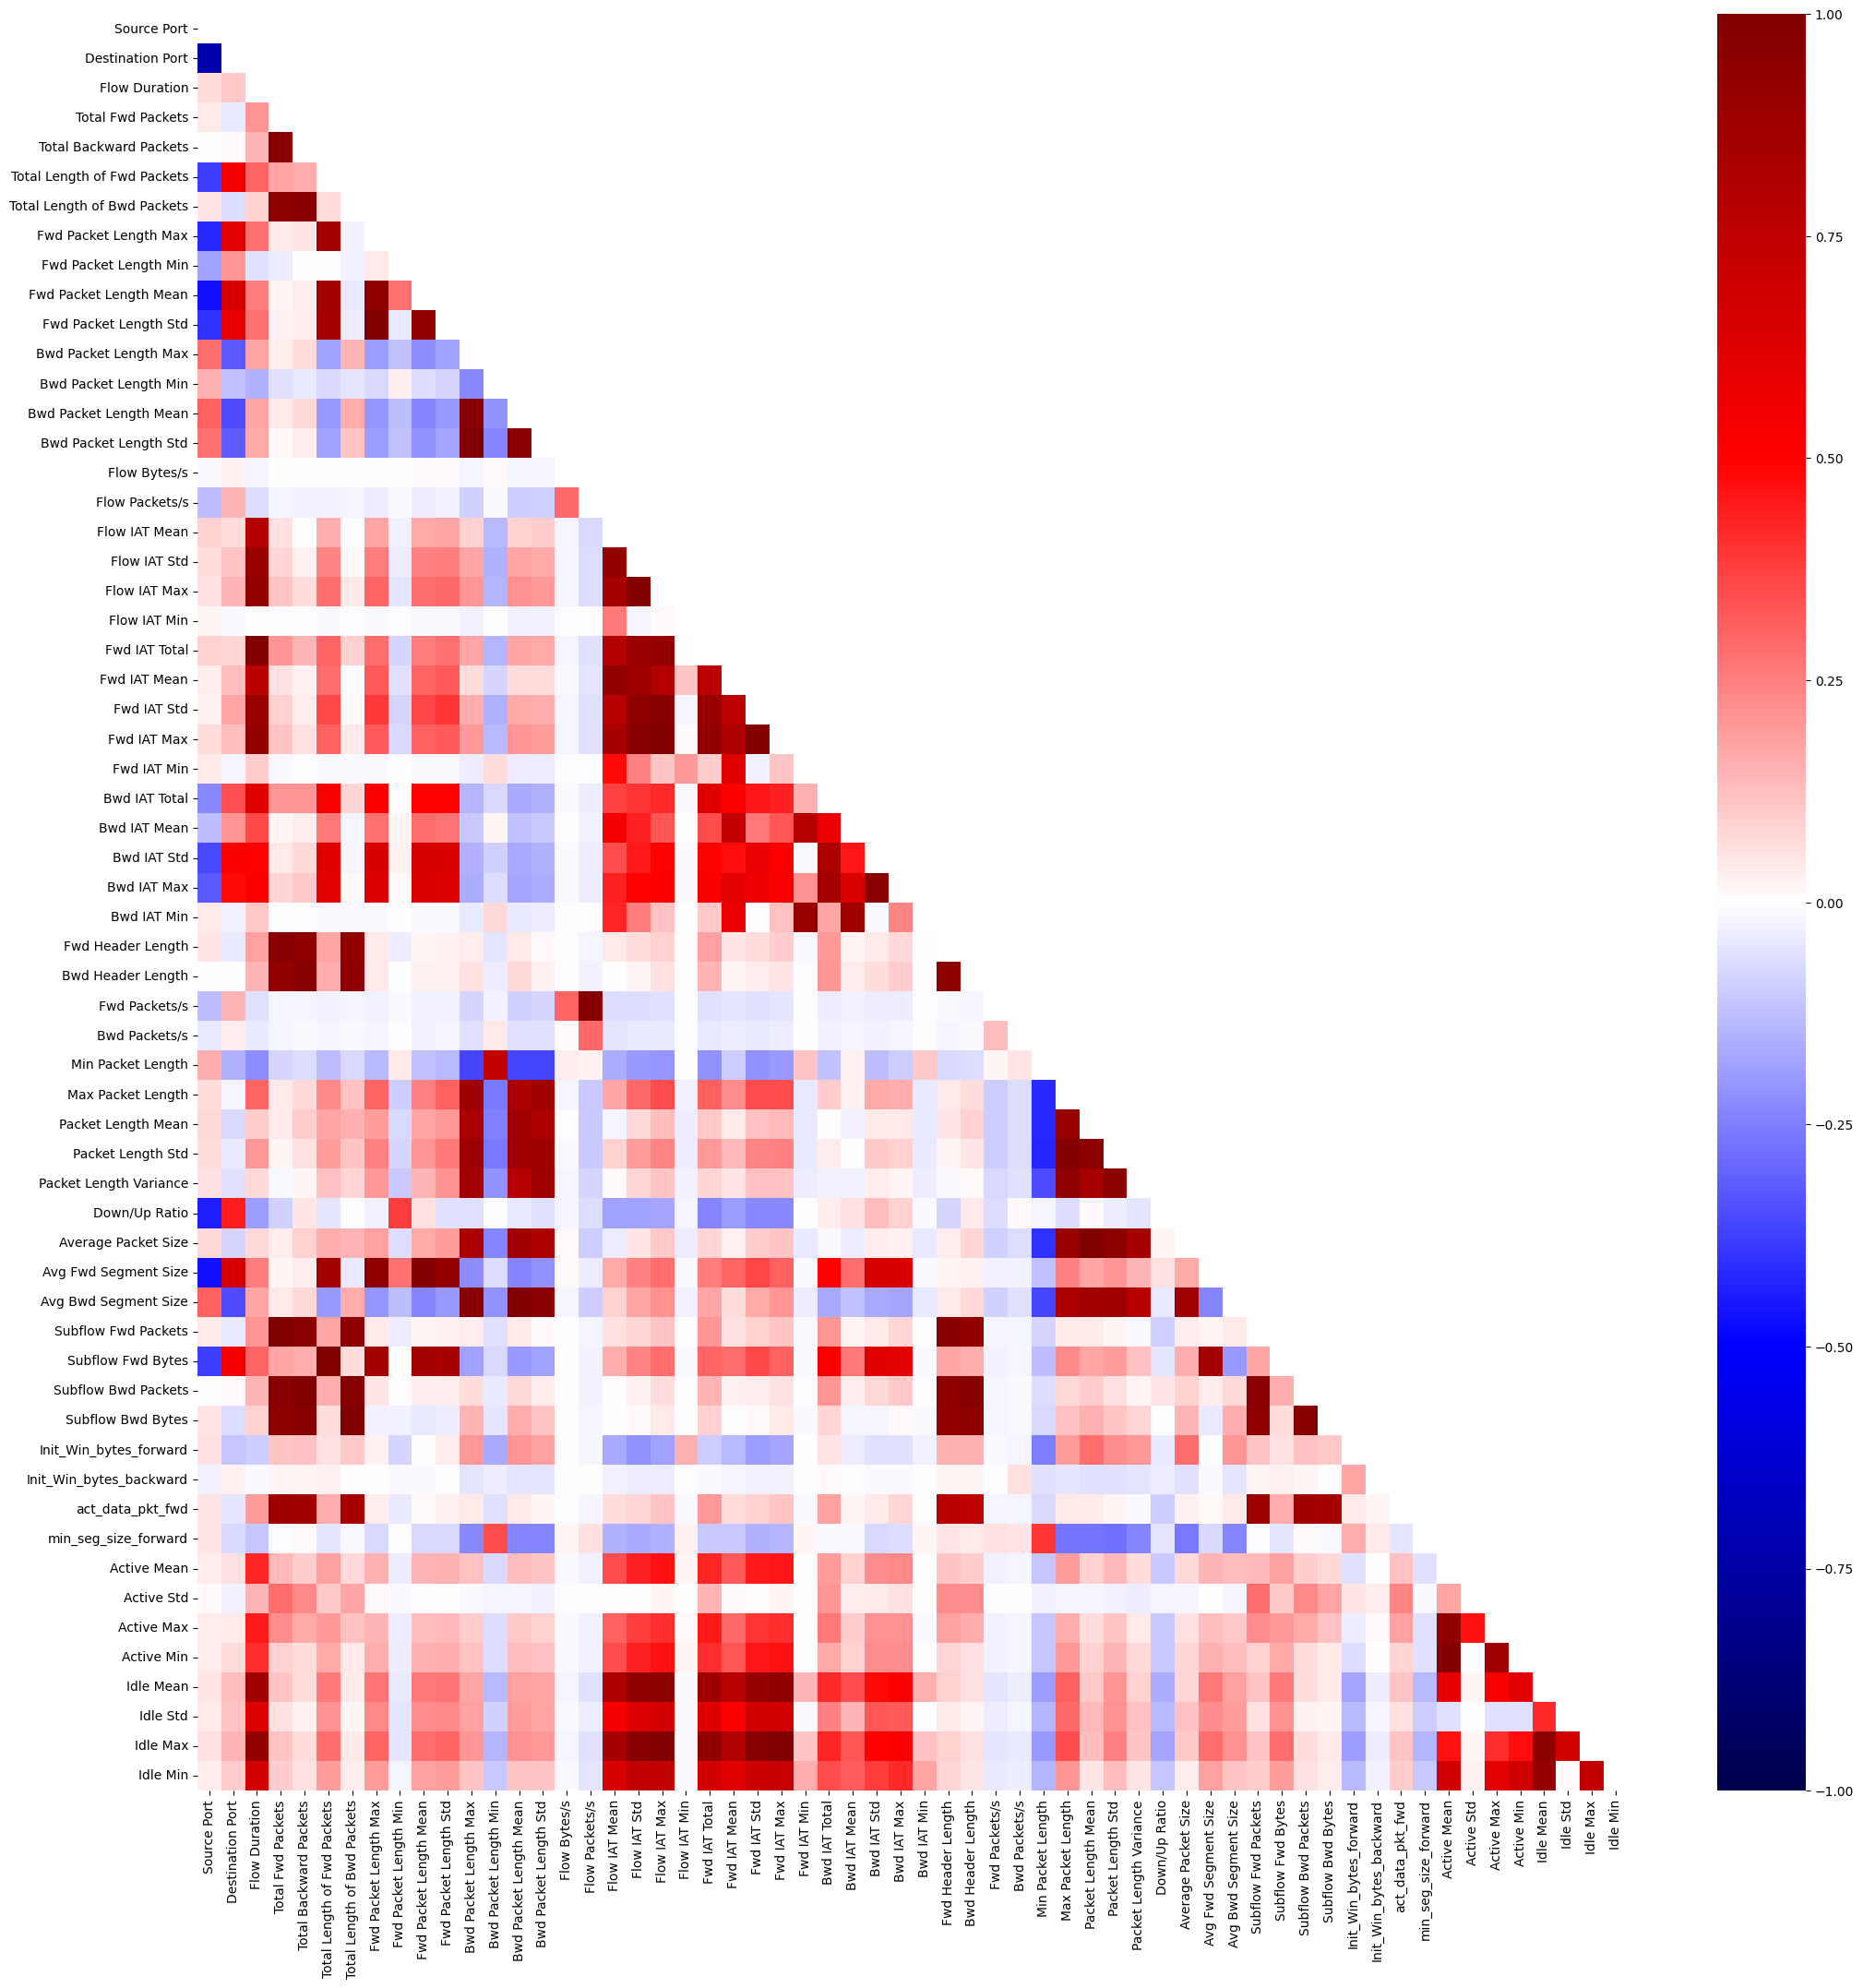

In [14]:
corr = df1_analyze.select_dtypes('number').corr()
mask = np.triu(corr)
plt.figure(figsize=(25,25))
sns.heatmap(corr, mask=mask, cmap='seismic', vmax=1, vmin=-1)
plt.show()

In [15]:
iterations = corr.columns
variance = df1_analyze.select_dtypes('number').var()
mask = np.triu(corr)
columns_to_drop = set()
print("High Linear Correlations\n")
for i in range(len(iterations)):
    for j in range(i):
        if abs(corr.iloc[i,j]) >= 0.8:
            print(f"{iterations[i]} v {iterations[j]}: {corr.iloc[i,j]}\n")
            if variance[iterations[i]] > variance[iterations[j]]:
                columns_to_drop.add(iterations[j])
            else:
                columns_to_drop.add(iterations[i])
        else:
            mask[i,j] = 1

print(f"{len(columns_to_drop)} Columns to drop:\n")
print(columns_to_drop)            

High Linear Correlations

Total Backward Packets v Total Fwd Packets: 0.9567136244127207

Total Length of Bwd Packets v Total Fwd Packets: 0.9384697830686014

Total Length of Bwd Packets v Total Backward Packets: 0.9704220582473434

Fwd Packet Length Max v Total Length of Fwd Packets: 0.852425217278092

Fwd Packet Length Mean v Total Length of Fwd Packets: 0.8584367853293069

Fwd Packet Length Mean v Fwd Packet Length Max: 0.940953183923084

Fwd Packet Length Std v Total Length of Fwd Packets: 0.8391376344888932

Fwd Packet Length Std v Fwd Packet Length Max: 0.9916724305462838

Fwd Packet Length Std v Fwd Packet Length Mean: 0.9196308911619563

Bwd Packet Length Mean v Bwd Packet Length Max: 0.9614403503257839

Bwd Packet Length Std v Bwd Packet Length Max: 0.9926829726002745

Bwd Packet Length Std v Bwd Packet Length Mean: 0.956005295562481

Flow IAT Std v Flow Duration: 0.8991755549188583

Flow IAT Std v Flow IAT Mean: 0.9175261684823351

Flow IAT Max v Flow Duration: 0.920254144362

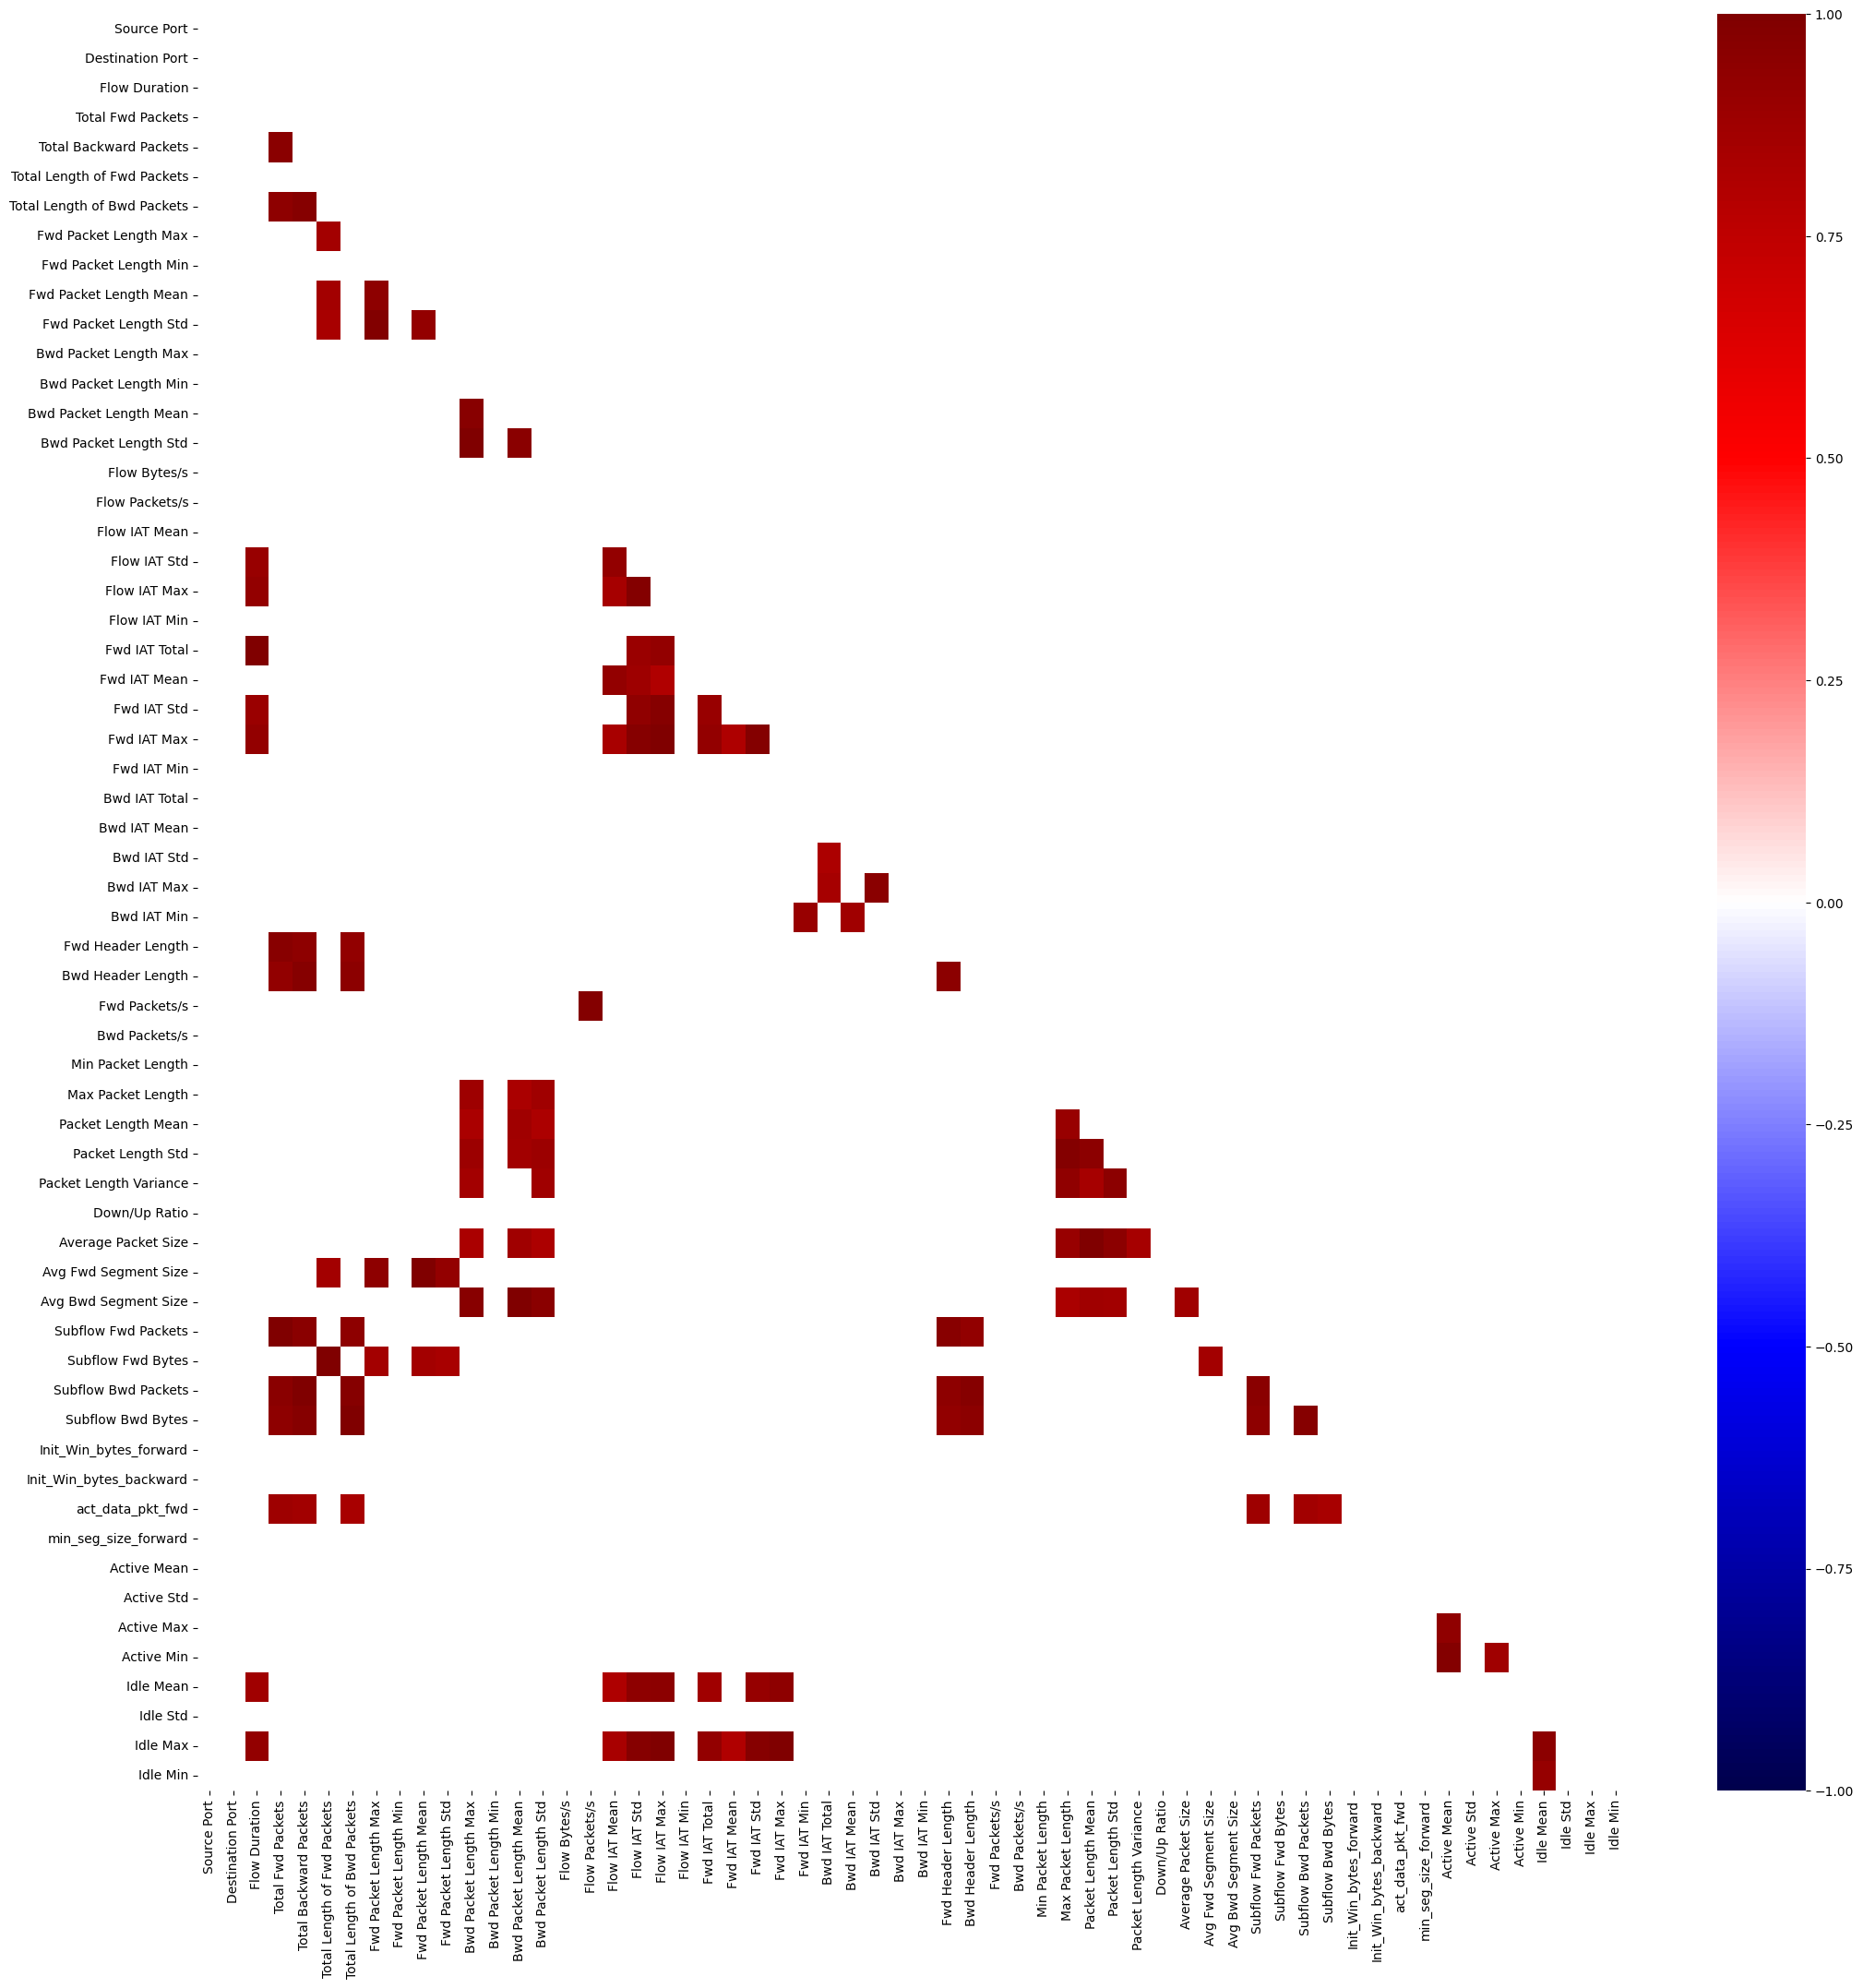

In [16]:
# Correlation above 0.8
plt.figure(figsize=(25,25))
sns.heatmap(corr, mask=mask, cmap='seismic', vmax=1, vmin=-1)
plt.show()

In [17]:
# Dropping columns with high correlation
df1_analyze = df1_analyze.drop(columns=columns_to_drop)

### Second Numerical Feature Analysis

1. Using Point-Biserial correlation, checking features correlation with label. Dropped columns with low correlation
2. 13 numerical columns remained, plot its histogram to have a grasp of their values distribution
3. Make scatterplot to figure out any possible clusters between two features

In [18]:
# Checking Correlation between numerical features with target with Point-Biserial Correlation
print("Low correlation numerical feature with Label\n")
columns_to_drop_2 = []
for x in df1_analyze.select_dtypes('number').columns:
    temp = stats.pointbiserialr(df1_analyze[x], df1_analyze['Label'])
    if abs(temp.statistic) < 0.1:
        print(f"{x}\t: {temp.statistic}")
        columns_to_drop_2.append(x)

print(f"Dropping {len(columns_to_drop_2)} columns...")
df1_analyze = df1_analyze.drop(columns=columns_to_drop_2)

Low correlation numerical feature with Label

Flow Bytes/s	: -0.03554493545691383
Flow IAT Min	: -0.038689705994943216
Fwd IAT Total	: 0.04049423866605309
Fwd Header Length	: -0.043973860151618666
Bwd Packets/s	: -0.0904048787180429
Init_Win_bytes_forward	: -0.05097124361890766
Active Std	: -0.07042469740266522
Active Max	: -0.009307613028294118
Idle Std	: 0.07798758182197796
Dropping 9 columns...


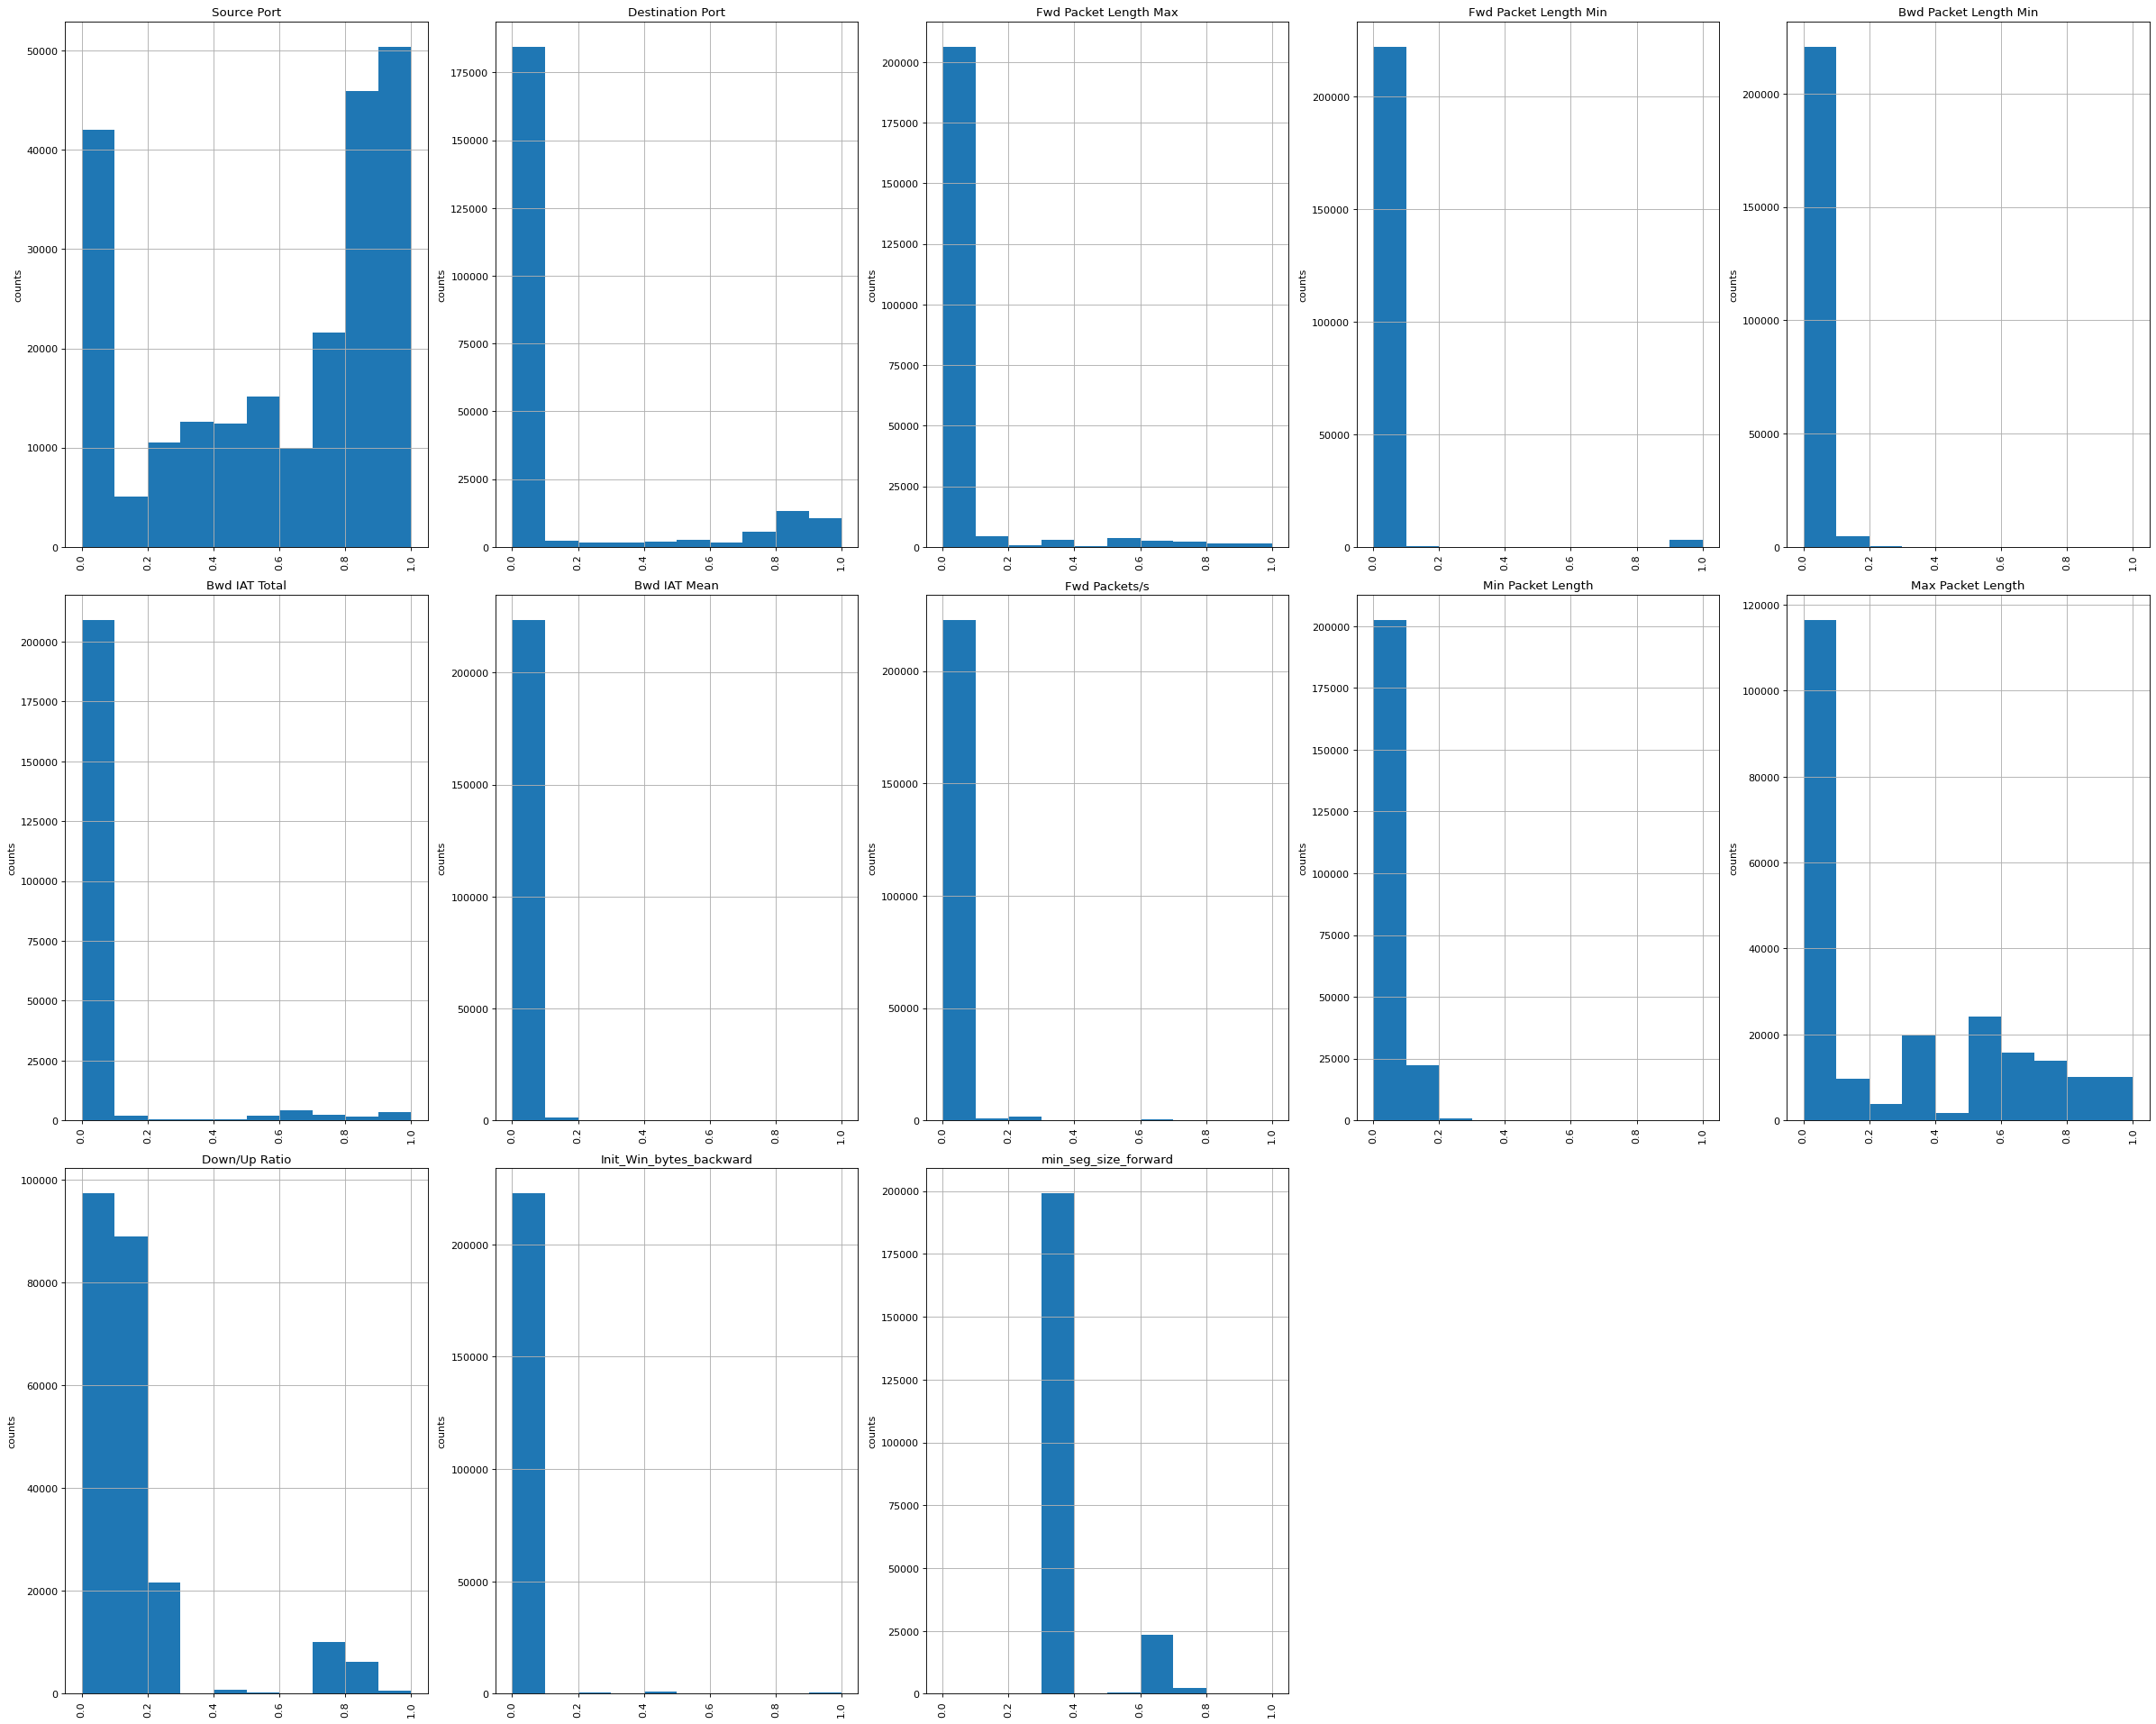

In [19]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    df = df.select_dtypes('number')
    nRow, nCol = df.shape
    columnNames = list(df)
    # Ensure nGraphRow is an integer
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow

    # Set up the figure size dynamically based on the number of graphs
    plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        columnDf.hist()
        
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]}')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# TODO Adjust parameters
plotPerColumnDistribution(df1_analyze, len(df1_analyze.select_dtypes('number').columns), 5)

def plotPerColumnScatter(df, nGraphShown, nGraphPerRow):
    columnNames = list(df.select_dtypes('number'))
    nCol = len(columnNames)
    # Ensure nGraphRow is an integer
    nGraphRow = int(round(nGraphShown / nGraphPerRow))

    # Set up the figure size dynamically based on the number of graphs
    # plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    fig, ax = plt.subplots(nGraphRow, nGraphPerRow, figsize=(6 * nGraphPerRow, 8 * nGraphRow)) 
    colormap = plt.cm.get_cmap('viridis')
    graph_counter = 0
    for i in range(min(nCol, nGraphShown)):
        for j in range(i):
            row = graph_counter // nGraphPerRow
            col = graph_counter % nGraphPerRow
            ax[row, col].scatter(df[columnNames[i]], df[columnNames[j]], c=df['Label'], cmap=colormap)
            ax[row, col].set_ylabel(f'{columnNames[j]}')
            ax[row, col].set_xlabel(f'{columnNames[i]}')
            ax[row, col].tick_params(axis='x', rotation=90)
            ax[row, col].set_title(f'{columnNames[i]} vs {columnNames[j]}')
            graph_counter += 1
            if graph_counter >= nGraphShown:
                break
        if graph_counter >= nGraphShown:
                break
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

number_of_columns = len(df1_analyze.select_dtypes('number').columns)
plotPerColumnScatter(df1_analyze, int(number_of_columns * (number_of_columns-1) / 2), 5)

### Categorical Columns Analysis

1. Make countplot to see distributions of target values. Some features have very lopsided count, some only have attacks in one side of the count (Protocols)
2. Checking any significant dependency between features and target with chi square test. All features have significant dependency with target (p < 0.05)
3. Checking any mutual information between features and target. Some features have almost no mutual information with target. Dropping those columns

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnCount(df, nGraphShown, nGraphPerRow):
    df = df.select_dtypes('bool')
    nRow, nCol = df.shape
    columnNames = list(df)
    # Ensure nGraphRow is an integer
    nGraphRow = nGraphShown // nGraphPerRow + (1 if nGraphShown % nGraphPerRow else 0)

    # Set up the figure size dynamically based on the number of graphs
    fig, ax = plt.subplots(nGraphRow, nGraphPerRow, figsize=(4 * nGraphPerRow, 4 * nGraphRow))
    graph_counter = 0
    for i in range(nGraphRow):
        for j in range(nGraphPerRow):
            ax[i,j] = sns.countplot(df, x=columnNames[graph_counter], hue='Label', ax=ax[i, j])
            ax[i,j].set_ylabel('counts')
            ax[i,j].set_title(f'{columnNames[graph_counter]}')
            for p in ax[i,j].patches:
                ax[i,j].annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points')
            graph_counter += 1
            if graph_counter >= min(nGraphShown,nCol):
                break
        if graph_counter >= min(nGraphShown,nCol):
                break
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

number_of_columns = len(df1_analyze.select_dtypes('bool').columns)
plotPerColumnCount(df1_analyze, number_of_columns, 3)

In [20]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

# Checking if there is any significant dependency between categorical features with target
chi2_stats, p_values = chi2(df1_analyze.drop(columns=['Label']).select_dtypes('bool'), df1_analyze['Label'])
columns = df1_analyze.drop(columns=['Label']).select_dtypes('bool').columns
for i in range(len(columns)):
    print(f"{columns[i]}\t: p_value={p_values[i]}")

Fwd PSH Flags	: p_value=0.0
FIN Flag Count	: p_value=2.098426458812254e-146
SYN Flag Count	: p_value=0.0
RST Flag Count	: p_value=2.7048311032787678e-09
PSH Flag Count	: p_value=0.0
ACK Flag Count	: p_value=2.5298218044405928e-231
URG Flag Count	: p_value=0.0
ECE Flag Count	: p_value=2.7048311032787678e-09
Protocol_0	: p_value=4.0116187262167116e-17
Protocol_6	: p_value=0.0
Protocol_17	: p_value=0.0


Text(0, 0.5, 'Features')

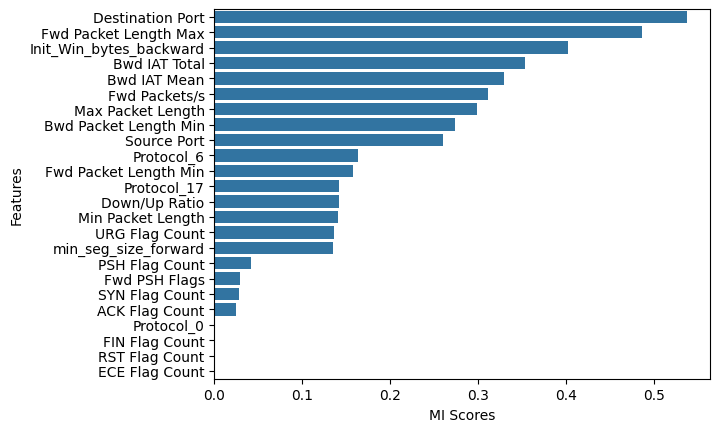

In [21]:
# Checking mutual information gain from features and target
mi_scores = mutual_info_classif(df1_analyze.drop(columns=['Label']), df1_analyze['Label'])
mi_scores = pd.Series(mi_scores, name="MI Scores", index=df1_analyze.drop(columns=['Label']).columns)
mi_scores = mi_scores.sort_values(ascending=False)

sns.barplot(x=mi_scores, y=mi_scores.index)
plt.ylabel('Features')

In [22]:
# Tagging columns with the least information gain (Mostly due to close to zero variation in values)
columns_to_drop_3 = ['FIN Flag Count', 'RST Flag Count', 'ECE Flag Count']

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

def normalize_timestamp(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.sort_values(by='Timestamp', inplace=True)
normalize_timestamp(df)

In [24]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

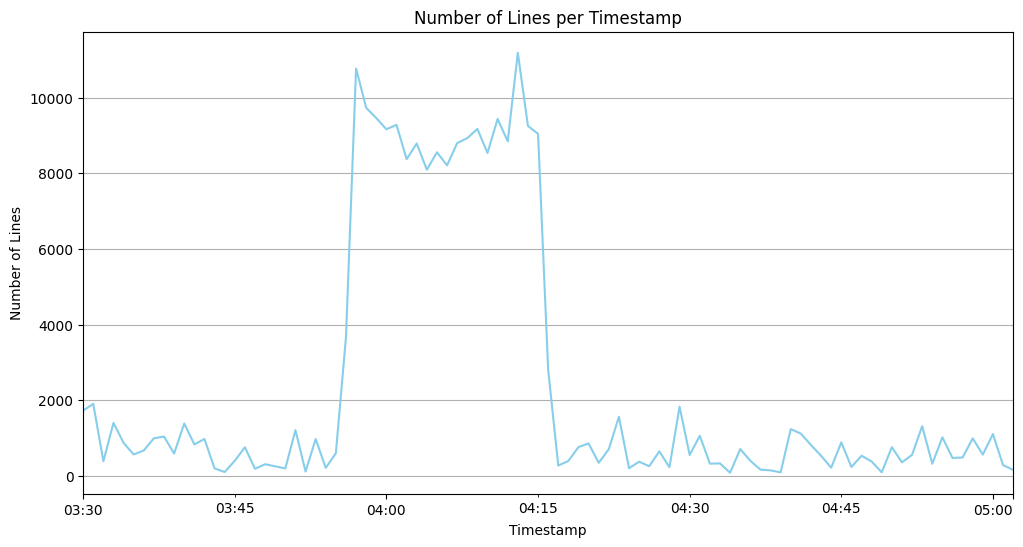

In [25]:
connection_grouped_by_time=df.sort_values(by='Timestamp').groupby('Timestamp').size()
plt.figure(figsize=(12, 6))
connection_grouped_by_time.plot(kind='line', color='skyblue')
plt.xlabel('Timestamp')
plt.ylabel('Number of Lines')
#plt.xticks(rotation=90)
plt.title('Number of Lines per Timestamp')
plt.grid(axis='y')
plt.show()

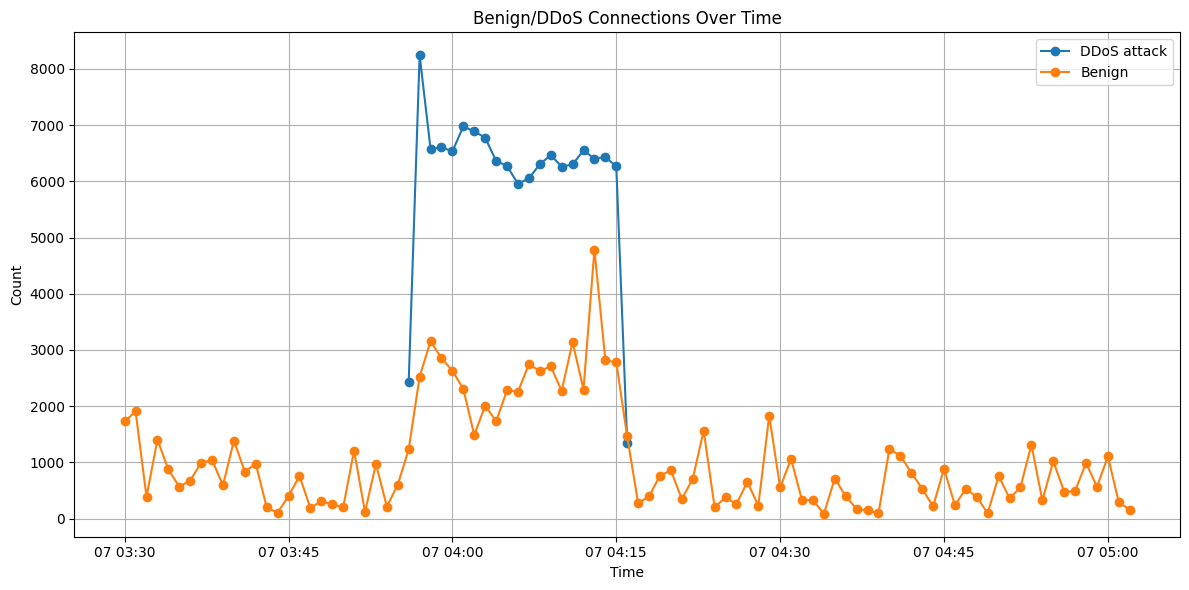

In [26]:
connection_by_time_b=df[df['Label']=='BENIGN'].sort_values(by='Timestamp').groupby('Timestamp').size()
connection_by_time_nb=df[df['Label']!='BENIGN'].sort_values(by='Timestamp').groupby('Timestamp').size()

plt.figure(figsize=(12, 6))
plt.plot(connection_by_time_nb, marker='o', linestyle='-',label='DDoS attack')
plt.plot(connection_by_time_b, marker='o', linestyle='-', label='Benign')
plt.title('Benign/DDoS Connections Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

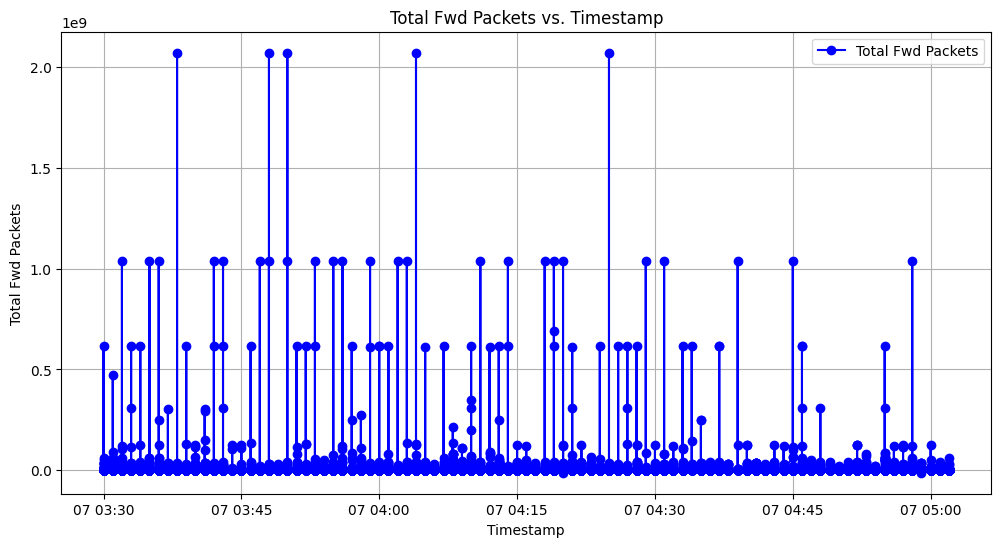

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'].values,df['Flow Bytes/s'].values, color='blue', marker='o', linestyle='-', label='Total Fwd Packets')
plt.title('Total Fwd Packets vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Total Fwd Packets')
plt.legend()
plt.grid(True)
plt.show()

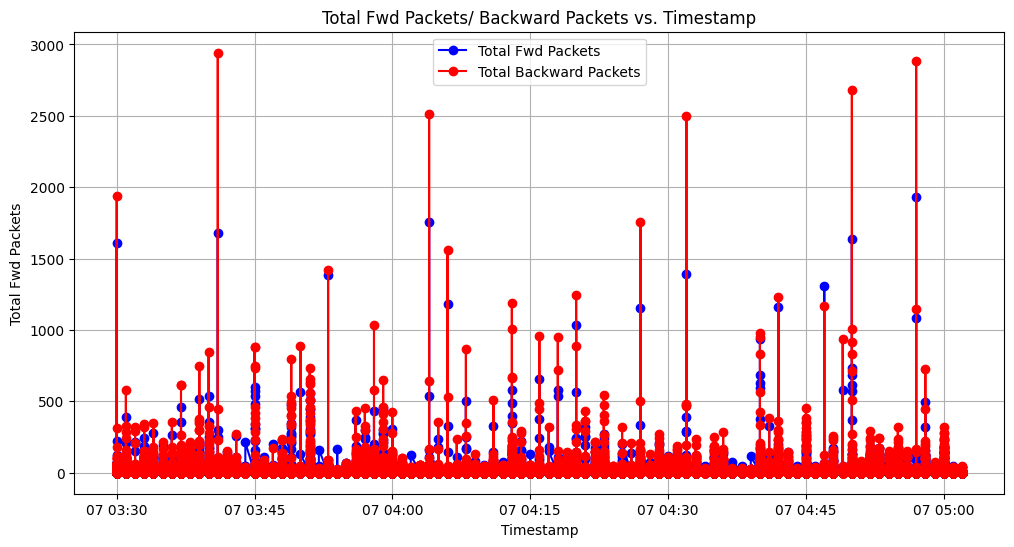

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'].values, df['Total Fwd Packets'].values, color='blue', marker='o', linestyle='-', label='Total Fwd Packets')
plt.plot(df['Timestamp'].values, df['Total Backward Packets'].values, color='red', marker='o', linestyle='-', label='Total Backward Packets')
plt.title('Total Fwd Packets/ Backward Packets vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Total Fwd Packets')
plt.legend()
plt.grid(True)
plt.show()

### Time series Model

In [29]:
df1_analyze = df.drop(columns=['Destination IP', 'Source IP', 'Flow ID', 'Fwd Header Length.1'])

In [30]:
df1_analyze.shape

(225745, 81)

In [31]:
# Drop any rows with nulls
df1_analyze = df1_analyze.drop(index=df1_analyze[df1_analyze.isnull().any(axis=1)].index)

# Drop any rows with infinity
df1_analyze = df1_analyze.drop(index=df1_analyze[df1_analyze.isin([np.inf, -np.inf]).any(axis=1)].index)

# Dropping columns with only 1 value
df1_analyze = df1_analyze.drop(columns=df_one_values)

# Dropping columns with high colinearity
df1_analyze = df1_analyze.drop(columns=columns_to_drop)

# Dropping columns that have low correlation with target
df1_analyze = df1_analyze.drop(columns=columns_to_drop_2)

# Dropping columns that have low mutual information gain with target
df1_analyze = df1_analyze.drop(columns=columns_to_drop_3)

# Change flags to boolean type
to_bool = []
for x in df1_analyze.columns:
    if "Flag" in x:
        to_bool.append(x)
#df1_analyze[to_bool] = df1_analyze[to_bool].astype('bool')

# Changing Label to 0 and 1
#df1_analyze['Label'] = df1_analyze['Label'].apply(lambda x: 1 if x == "DDoS" else 0)
#df1_analyze['Label'] = df1_analyze['Label'].map({'DDoS': 0, 'BENIGN': 1}) 
#df1_analyze['Label'] = df1_analyze['Label'].astype('bool')

df1_analyze.shape

(225711, 21)

In [32]:
def setting_time_as_an_index(df1_analyze):
    df1_analyze.set_index('Timestamp', inplace=True)
setting_time_as_an_index(df1_analyze)

In [33]:
df1_analyze.shape

(225711, 20)

In [34]:
df1_analyze.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225711 entries, 2017-07-07 03:30:00 to 2017-07-07 05:02:00
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Source Port              225711 non-null  int64  
 1   Destination Port         225711 non-null  int64  
 2   Protocol                 225711 non-null  int64  
 3   Fwd Packet Length Max    225711 non-null  int64  
 4   Fwd Packet Length Min    225711 non-null  int64  
 5   Bwd Packet Length Min    225711 non-null  int64  
 6   Bwd IAT Total            225711 non-null  int64  
 7   Bwd IAT Mean             225711 non-null  float64
 8   Fwd PSH Flags            225711 non-null  int64  
 9   Fwd Packets/s            225711 non-null  float64
 10  Min Packet Length        225711 non-null  int64  
 11  Max Packet Length        225711 non-null  int64  
 12  SYN Flag Count           225711 non-null  int64  
 13  PSH Flag Count           

In [35]:
numerical_columns= df1_analyze.select_dtypes('number').columns
numerical_columns

Index(['Source Port', 'Destination Port', 'Protocol', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Bwd Packet Length Min', 'Bwd IAT Total',
       'Bwd IAT Mean', 'Fwd PSH Flags', 'Fwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'SYN Flag Count', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio',
       'Init_Win_bytes_backward', 'min_seg_size_forward'],
      dtype='object')

In [36]:
df1_analyze['Label'] = df1_analyze['Label'].map({'DDoS': 0, 'BENIGN': 1}) 

In [37]:
import numpy as np
import warnings
np.warnings = warnings
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder

label_encoder = LabelEncoder()
scaler = StandardScaler()
power_transformer = PowerTransformer()

In [38]:
df1_analyze['Protocol'] = label_encoder.fit_transform(df1_analyze['Protocol'])
skewed_features = ['Bwd IAT Total', 'Bwd IAT Mean', 'Fwd Packets/s']
for feature in skewed_features:
    if feature in df1_analyze.columns:
        df1_analyze[feature] = np.log1p(df1_analyze[feature])

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Assuming `df1_analyze` is your original DataFrame

# Prepare the trainX and trainY arrays using the sliding window method
trainX = []
trainY = []
n_future = 1
n_past = 10
for i in range(n_past, len(df1_analyze) - n_future + 1):
    trainX.append(df1_analyze.iloc[i - n_past:i, :].values)  # Extract past `n_past` rows
    trainY.append(df1_analyze.iloc[i + n_future - 1:i + n_future]['Label'].values)  # Extract corresponding labels

trainX = np.array(trainX)
trainY = np.array(trainY)

# Determine the split index for 70% training and 30% testing
train_size = int(len(trainX) * 0.7)

# Split the data chronologically
X_train, X_test = trainX[:train_size], trainX[train_size:]
y_train, y_test = trainY[:train_size], trainY[train_size:]

# Initialize scalers
scaler = StandardScaler()
power_transformer = PowerTransformer()

# Apply Standard Scaling to X_train and X_test
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)  # Flatten, scale, then reshape
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)  # Only transform on test

# Apply Power Transformation to X_train and X_test
X_train = power_transformer.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = power_transformer.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Check the shape of the data after transformations
print(f"Train X shape: {X_train.shape}, Train Y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}, Test Y shape: {y_test.shape}")

Train X shape: (157990, 10, 20), Train Y shape: (157990, 1)
Test X shape: (67711, 10, 20), Test Y shape: (67711, 1)


### Building the LSTM Model, Training and Evaluation:

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

2024-11-07 11:15:04.906836: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-07 11:15:04.917426: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730949304.929106    7039 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730949304.932590    7039 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-07 11:15:04.944603: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [41]:
model=Sequential([
    LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=64, return_sequences=True),
    LSTM(units=32, return_sequences=False),
    Dropout(0.01),
    Dense(units=1, activation='sigmoid') 
])
model.compile(optimizer=Adam(learning_rate=1e-4),loss=BinaryCrossentropy(),metrics=['accuracy'])
model.summary()

2024-11-07 11:15:06.126209: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/ecs-user/is5126/final-project/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 128)        │        76,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,145 (539.63 KB)

 Trainable params: 138,145 (539.63 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history_log=model.fit(X_train, y_train, epochs=100, batch_size=1024, validation_split=0.2,verbose=2, shuffle=False)

Epoch 1/100
124/124 - 9s - 76ms/step - accuracy: 0.9782 - loss: 0.3929 - val_accuracy: 0.9977 - val_loss: 0.1413
Epoch 2/100
124/124 - 7s - 54ms/step - accuracy: 0.9978 - loss: 0.0830 - val_accuracy: 0.9979 - val_loss: 0.0462
Epoch 3/100
124/124 - 7s - 53ms/step - accuracy: 0.9983 - loss: 0.0369 - val_accuracy: 0.9978 - val_loss: 0.0271
Epoch 4/100
124/124 - 7s - 53ms/step - accuracy: 0.9983 - loss: 0.0230 - val_accuracy: 0.9978 - val_loss: 0.0201
Epoch 5/100
124/124 - 7s - 53ms/step - accuracy: 0.9983 - loss: 0.0173 - val_accuracy: 0.9978 - val_loss: 0.0170
Epoch 6/100
124/124 - 7s - 53ms/step - accuracy: 0.9983 - loss: 0.0147 - val_accuracy: 0.9978 - val_loss: 0.0153
Epoch 7/100
124/124 - 7s - 53ms/step - accuracy: 0.9984 - loss: 0.0131 - val_accuracy: 0.9979 - val_loss: 0.0141
Epoch 8/100
124/124 - 7s - 53ms/step - accuracy: 0.9984 - loss: 0.0120 - val_accuracy: 0.9979 - val_loss: 0.0130
Epoch 9/100
124/124 - 7s - 53ms/step - accuracy: 0.9984 - loss: 0.0109 - val_accuracy: 0.9981 - 

### Plotting loss per epoch:

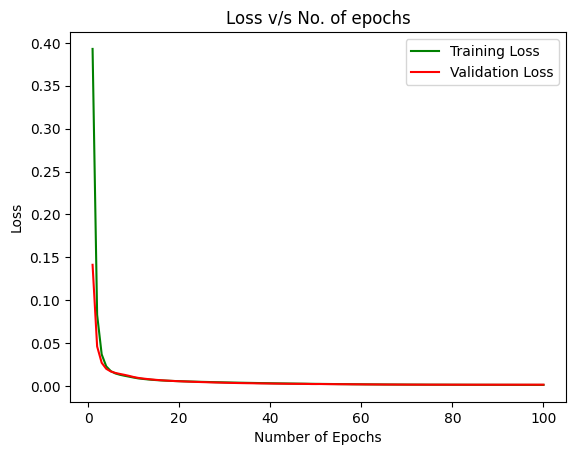

In [43]:
loss = history_log.history['loss']
val_loss = history_log.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting the accuracy per epoch:

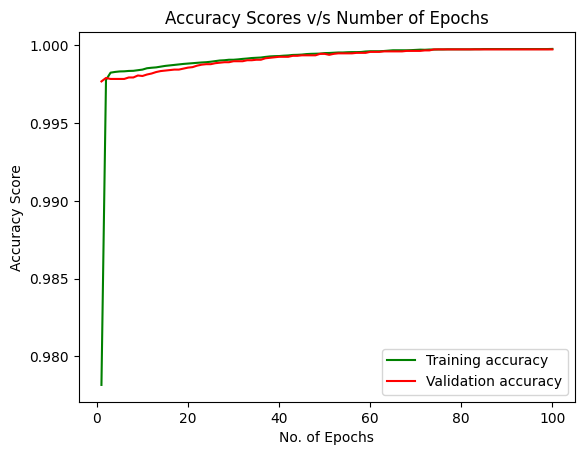

In [44]:
accuracy = history_log.history['accuracy']
val_accuracy = history_log.history['val_accuracy']
plt.plot(epochs, accuracy , 'g', label = 'Training accuracy')
plt.plot(epochs, val_accuracy , 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

### Prediction

2116/2116 - 5s - 2ms/step - accuracy: 0.9991 - loss: 0.0038
Test Loss: 0.0038
Test Accuracy: 0.9991


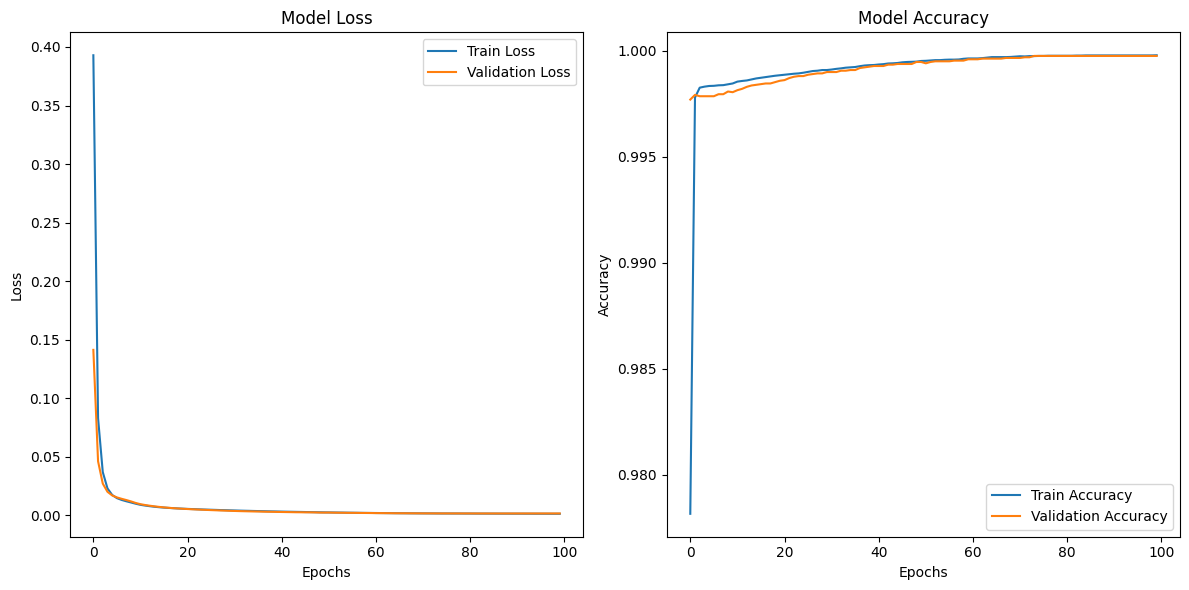

67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
Prediction Accuracy: 0.9991
Confusion Matrix:
 [[26823    15]
 [   48 40825]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26838
           1       1.00      1.00      1.00     40873

    accuracy                           1.00     67711
   macro avg       1.00      1.00      1.00     67711
weighted avg       1.00      1.00      1.00     67711



In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training & validation loss and accuracy
history = history_log.history

# Plot the loss curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test, batch_size=1024)

# Since the last layer is a sigmoid activation, the outputs will be probabilities
# Convert these probabilities to binary labels (0 or 1) based on a threshold of 0.5
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate predictions
print(f"Prediction Accuracy: {accuracy_score(y_test, y_pred_binary):.4f}")

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("Classification Report:\n", classification_report(y_test, y_pred_binary))

In [46]:
import pickle

# Save the model's architecture and weights
with open('lstm_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Model saved to 'lstm_model.pkl'")

Model saved to 'lstm_model.pkl'


In [47]:
import pickle

# Load the model from the pickle file
with open('lstm_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
print("Model loaded from pickle file!")

# Evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Model loaded from pickle file!
2116/2116 - 6s - 3ms/step - accuracy: 0.9991 - loss: 0.0038
Test Loss: 0.0038
Test Accuracy: 0.9991
